# Load library

In [3]:
import numpy as np
import pandas as pd
import xarray as xr
import rasterio
import matplotlib.pyplot as plt
from joblib import dump, load

# Get Weather model

In [7]:
wm = xr.load_dataset('../GNSS/Global_dat/Full_Global_data/WM_files/ERA-5_2017_01_01_T00_00_00_90S_90N_180W_180E.nc')
wm

<xarray.Dataset>
Dimensions:      (x: 1437, y: 717, z: 32)
Coordinates:
  * x            (x) float64 -179.6 -179.4 -179.1 -178.9 ... 178.9 179.1 179.4
  * y            (y) float64 -89.6 -89.35 -89.1 -88.85 ... 88.65 88.9 89.15 89.4
  * z            (z) float32 -500.0 -300.0 -200.0 ... 4.374e+04 4.841e+04
Data variables:
    WGS84        |S1 b''
    latitude     (z, y, x) float64 -3.403e+38 -3.403e+38 ... -3.403e+38
    longitude    (z, y, x) float64 -3.403e+38 -3.403e+38 ... -3.403e+38
    t            (z, y, x) float32 265.7 265.7 265.7 265.7 ... 248.8 248.8 248.8
    p            (z, y, x) float32 9.895e+04 9.895e+04 9.895e+04 ... 163.2 163.2
    e            (z, y, x) float32 78.24 78.24 78.24 ... -0.0005878 -0.000588
    wet          (z, y, x) float32 4.224 4.224 4.224 ... -3.615e-05 -3.617e-05
    hydro        (z, y, x) float32 289.0 289.0 289.0 ... 0.5088 0.5088 0.5088
    wet_total    (z, y, x) float32 0.0212 0.0212 0.0212 0.02119 ... 0.0 0.0 0.0
    hydro_total  (z, y, x) float32 2.44 2.44 2.44 2.44 2.44 ... 0.0 0.0 0.0 0.0
Attributes:
    Conventions:   CF-1.6
    datetime:      2017_01_01T00_00_00
    date_created:  2023_01_21T15_18_24
    title:         Weather model data and delay calculations

# Load ML model

In [4]:
import tensorflow as tf
model = tf.keras.models.load_model('Model/global_PTE_fixed_hgtlvs_02_20_model/')

2023-02-21 17:12:53.768753: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX AVX2 AVX512F FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-02-21 17:13:19.735933: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX AVX2 AVX512F FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [6]:
model.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_84 (Dense)            (None, 155)               24180     
                                                                 
 p_re_lu_7 (PReLU)           (None, 155)               155       
                                                                 
 dropout_77 (Dropout)        (None, 155)               0         
                                                                 
 dense_85 (Dense)            (None, 155)               24180     
                                                                 
 dropout_78 (Dropout)        (None, 155)               0         
                                                                 
 dense_86 (Dense)            (None, 80)                12480     
                                                                 
 dropout_79 (Dropout)        (None, 80)               

# Test on InSAR application

For the testing of InSAR application of the trained model, we take the area of Pennsylvania and compare the performance of RF, NN, and RAiDER prediction

In [12]:
import glob

In [10]:
weather_file_path = '../InSAR/Pennsylvania/weather_files/'
uw_ifg = '../InSAR/Pennsylvania/Extracted/unwrappedPhase/'
coh_ifg = '../InSAR/Pennsylvania/Extracted/coherence/'

In [37]:
dates = glob.glob(uw_ifg+'????????_????????')

In [83]:
dates.sort()
dates[::5]

['../InSAR/Pennsylvania/Extracted/unwrappedPhase/20200212_20200131',
 '../InSAR/Pennsylvania/Extracted/unwrappedPhase/20200412_20200331',
 '../InSAR/Pennsylvania/Extracted/unwrappedPhase/20200611_20200530',
 '../InSAR/Pennsylvania/Extracted/unwrappedPhase/20200810_20200729',
 '../InSAR/Pennsylvania/Extracted/unwrappedPhase/20201009_20200927',
 '../InSAR/Pennsylvania/Extracted/unwrappedPhase/20201208_20201126']

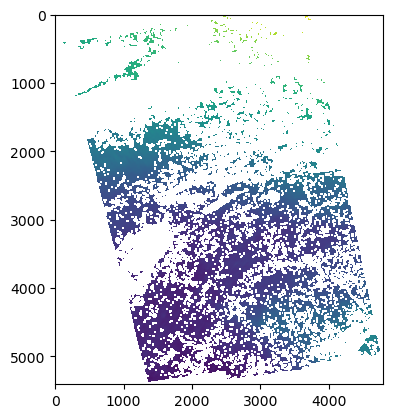

In [80]:
ifg__ = rasterio.open(dates[::2][0])
ifg__ = ifg__.read(1)
ifg__[~mask] = np.nan
plt.imshow(ifg__)
plt.show()

In [115]:
coh_list = []
for path in glob.glob(coh_ifg+'*[0-9].vrt'):
    with rasterio.open(path) as file:
        coh_ = file.read(1)
        coh_[coh_==0] = np.nan
        avg_coh = np.nanmean(coh_)
        if avg_coh > 0.8:
            coh_list.append(path.split('/')[-1].split('.')[0])

In [131]:
coh_list, [i.split('/'dates

(['20200114_20200102',
  '20200212_20200131',
  '20200307_20200224',
  '20200314_20200302',
  '20200319_20200307',
  '20200326_20200314',
  '20200331_20200319',
  '20200407_20200326',
  '20200412_20200331',
  '20200419_20200407',
  '20200424_20200412',
  '20200501_20200419',
  '20200506_20200424',
  '20201028_20201016',
  '20201121_20201109',
  '20201126_20201114',
  '20201203_20201121',
  '20201215_20201203'],
 ['../InSAR/Pennsylvania/Extracted/unwrappedPhase/20200212_20200131',
  '../InSAR/Pennsylvania/Extracted/unwrappedPhase/20200224_20200212',
  '../InSAR/Pennsylvania/Extracted/unwrappedPhase/20200307_20200224',
  '../InSAR/Pennsylvania/Extracted/unwrappedPhase/20200319_20200307',
  '../InSAR/Pennsylvania/Extracted/unwrappedPhase/20200331_20200319',
  '../InSAR/Pennsylvania/Extracted/unwrappedPhase/20200412_20200331',
  '../InSAR/Pennsylvania/Extracted/unwrappedPhase/20200424_20200412',
  '../InSAR/Pennsylvania/Extracted/unwrappedPhase/20200506_20200424',
  '../InSAR/Pennsylvania/

In [128]:
ifg_list = [e for e in coh_list if e in dates]

In [129]:
list3 = [e for e in list2 if e[0] in list1]

[]

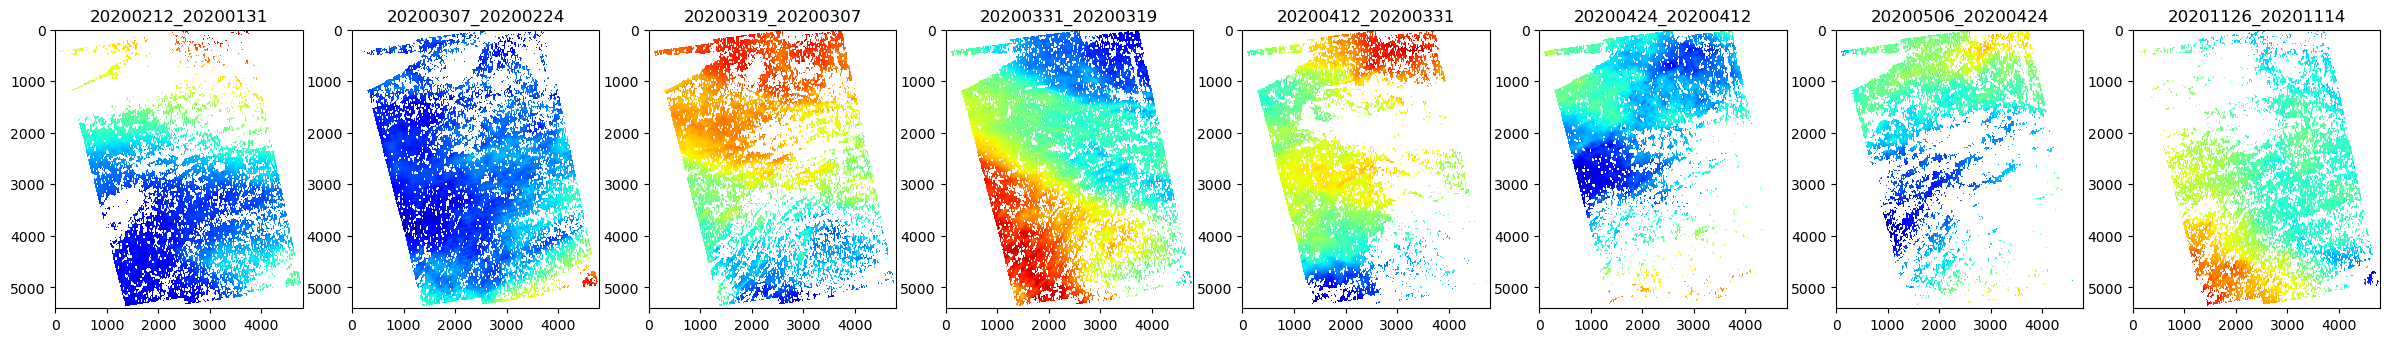

In [127]:

fig, axes = plt.subplots(1, 8, figsize=(30,15))
for i, date in enumerate(ifg_list):
    ifg_path = uw_ifg+date
    coh_path = coh_ifg+date+'.vrt'
    with rasterio.open(coh_path) as file:
        coh = file.read(1)
        mask = coh>0.6
    try:
        with rasterio.open(ifg_path) as file:
            ifg = file.read(1)
            ifg[~mask] = np.nan
            axes[i].imshow(ifg, cmap='jet')
            axes[i].title.set_text(date)
    except:
        continue
    """ Iterate column's axes"""
    


plt.show()

In [120]:
coh_list.sort()
coh_list[::3]

['20200114_20200102',
 '20200314_20200302',
 '20200331_20200319',
 '20200419_20200407',
 '20200506_20200424',
 '20201126_20201114']

0.3765875

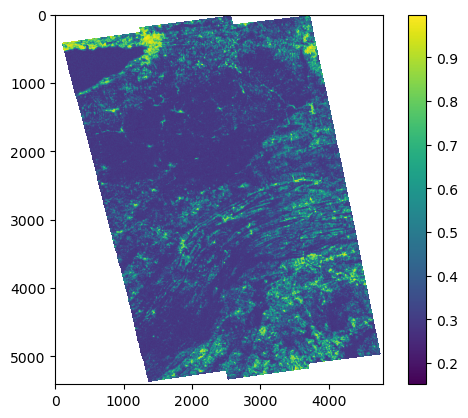

In [110]:
coh_ = rasterio.open(glob.glob(coh_ifg+'*[0-9].vrt')[0])
coh_ = coh_.read(1)
coh_[coh_==0] = np.nan
plt.imshow(coh_)
plt.colorbar()
avg_coh = np.nanmean(coh_)
avg_coh

In [ ]:
np.mean